<a href="https://colab.research.google.com/github/Holmes-Alan/MNIST_LeNet/blob/main/MNIST_CNN_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Holmes-Alan/MNIST_LeNet.git

Cloning into 'MNIST_LeNet'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 15.33 MiB | 15.05 MiB/s, done.


In [ ]:
cd MNIST_LeNet

/content/MNIST_LeNet


In [ ]:
!unzip mnist_data.zip

Archive:  mnist_data.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [ ]:
import numpy as np # to handle matrix and data operation
import pandas as pd # to read csv and handle dataframe

import torch # to load pytorch library
import torch.nn as nn # to load pytorch library
import torch.nn.functional as F # to load pytorch function
import torch.utils.data # to load data processor
from torch.autograd import Variable # pytorch data type
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 785 entries, 5 to 0.617
dtypes: int64(785)
memory usage: 359.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 59.9 MB


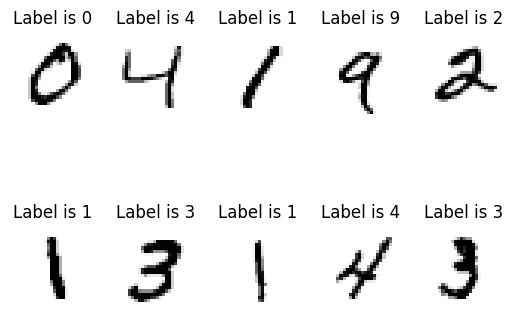

In [ ]:
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')
train.info()
test.info()

# split image and label
train_label = train.iloc[:, 0].values
train_img = train.iloc[:, 1:]
test_label = test.iloc[:, 0].values
test_img = test.iloc[:, 1:]
# check the dataset of one example
count=1
for a in range (10):
    imarray = train_img.iloc[a, :].values.reshape(28,28)
    plt.subplot(2,5,count)
    plt.subplots_adjust(hspace=0.1)
    count += 1
    plt.axis('off')
    plt.title("Label is " + str(train_label[a]))
    plt.imshow(imarray, cmap='Greys', interpolation='None')

In [ ]:
# reshape to be [samples][pixels][width][height]
train_img = train_img.values.reshape(-1,1,28,28)
test_img = test_img.values.reshape(-1,1,28,28)
train_img = train_img / 255.0
test_img = test_img / 255.0
# normalize inputs from 0-255 to 0-1
print(train_img.shape)
print(train_label.shape)
print(test_img.shape)
print(test_label.shape)

BATCH_SIZE = 1000

# create feature and targets tensor for training set.
torch_X_train = torch.from_numpy(train_img).float()
torch_y_train = torch.from_numpy(train_label)
# create feature and targets tensor for testing set.
torch_X_test = torch.from_numpy(test_img).float()
torch_y_test = torch.from_numpy(test_label)
# Pytorch train and test sets
train = torch.utils.data.TensorDataset(torch_X_train,torch_y_train)
test = torch.utils.data.TensorDataset(torch_X_test,torch_y_test)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = BATCH_SIZE, shuffle = False, num_workers=4)
test_loader = torch.utils.data.DataLoader(test, batch_size = BATCH_SIZE, shuffle = False, num_workers=4)

(59999, 1, 28, 28)
(59999,)
(9999, 1, 28, 28)
(9999,)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# Defining the network (LeNet-5)
class LeNet5(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.act1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.act2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(in_features=400, out_features=120)
        self.act3 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.act4 = nn.ReLU()
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        #Convolutional Layer/Pooling Layer/Activation
        x = self.conv1(x)
        x = self.act1(x)
        x = self.maxpool1(x)
        #Convolutional Layer/Dropout/Pooling Layer/Activation
        x = self.conv2(x)
        x = self.act2(x)
        x = self.maxpool2(x)
        x = x.view(-1, 400)
        #Fully Connected Layer/Activation
        x = self.fc1(x)
        x = self.act3(x)
        #Fully Connected Layer/Activation
        x = self.fc2(x)
        x = self.act4(x)

        return self.fc3(x)

criterion = nn.CrossEntropyLoss()
criterion = criterion.cuda()

In [ ]:
def train(epoch):
    model.train()
    epoch_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.cuda(), target.cuda()
        #Variables in Pytorch are differenciable.
        data, target = Variable(data), Variable(target)
        #This will zero out the gradients for this batch.
        optimizer.zero_grad()
        output = model(data)
        # Calculate the loss The negative log likelihood loss. It is useful to train a classification problem with C classes.
        loss = criterion(output, target)
        #dloss/dx for every Variable
        loss.backward()
        #to do a one-step update on our parameter.
        optimizer.step()
        epoch_loss += loss.item()
    #Print out the loss periodically.
    avg_loss = epoch_loss / len(train_loader)
    print("===> Epoch {} Complete: Training loss: {:.4f}".format(epoch, avg_loss))
    return avg_loss

In [ ]:
def train_accuracy(epoch):
    model.eval()
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)
        with torch.no_grad():
            output = model(data)
        _, predicted = torch.max(output.data, 1) # get the index of the max log-probability
        correct += (predicted == target).sum().item()
    avg_accuracy = correct / len(train_loader.dataset)
    print("===> Epoch {} Complete: Training accuracy: {:.4f}%".format(epoch, 100. * avg_accuracy))
    return avg_accuracy

In [ ]:
def test(epoch):
    model.eval()
    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)
        with torch.no_grad():
            output = model(data)
        _, predicted = torch.max(output.data, 1) # get the index of the max log-probability
        correct += (predicted == target).sum().item()
    avg_accuracy = correct / len(test_loader.dataset)
    print("===> Epoch {} Complete: Testing accuracy: {:.4f}%".format(epoch, 100. * avg_accuracy))
    return avg_accuracy

In [ ]:
def checkpoint(epoch):
    model_out_path = "Training_epoch_{}.pth".format(epoch)
    torch.save(model.state_dict(), model_out_path)
    print("Checkpoint saved to {}".format(model_out_path))

In [ ]:
model = LeNet5()
model.cuda()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

**Task 1:** The following code should be the task that the students complete themselves. A full loop that records the training loss and testing accuracy

In [ ]:
train_losses = []
train_correct = []
test_correct = []
for epoch in range(1, 101, 1):
    train_losses.append(train(epoch))
    train_correct.append(train_accuracy(epoch))
    test_correct.append(test(epoch))
    if epoch % 10 == 0:
        checkpoint(epoch)

===> Epoch 1 Complete: Training loss: 2.3023
===> Epoch 1 Complete: Training accuracy: 10.4435%
===> Epoch 1 Complete: Testing accuracy: 10.2710%
===> Epoch 2 Complete: Training loss: 2.2990
===> Epoch 2 Complete: Training accuracy: 10.4452%
===> Epoch 2 Complete: Testing accuracy: 10.2810%
===> Epoch 3 Complete: Training loss: 2.2954
===> Epoch 3 Complete: Training accuracy: 10.6685%
===> Epoch 3 Complete: Testing accuracy: 10.4910%
===> Epoch 4 Complete: Training loss: 2.2904
===> Epoch 4 Complete: Training accuracy: 24.6221%
===> Epoch 4 Complete: Testing accuracy: 24.6325%
===> Epoch 5 Complete: Training loss: 2.2825
===> Epoch 5 Complete: Training accuracy: 29.7922%
===> Epoch 5 Complete: Testing accuracy: 29.9430%
===> Epoch 6 Complete: Training loss: 2.2688
===> Epoch 6 Complete: Training accuracy: 41.2140%
===> Epoch 6 Complete: Testing accuracy: 41.3341%
===> Epoch 7 Complete: Training loss: 2.2382
===> Epoch 7 Complete: Training accuracy: 54.9926%
===> Epoch 7 Complete: Testi

**Task 2.** Plot the training loss and testing accuracy VS epoches

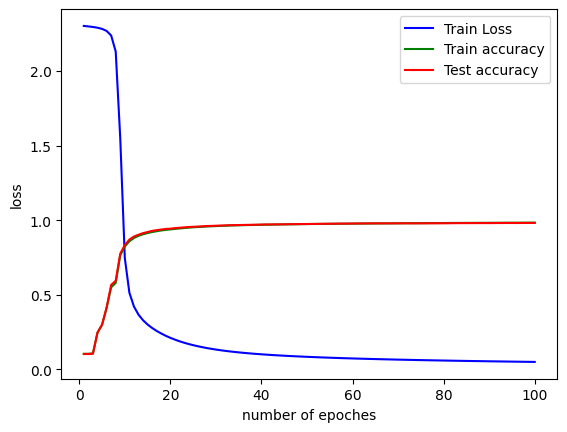

In [ ]:
fig = plt.figure()
plt.plot(np.arange(1,101,1), train_losses, color='blue')
plt.plot(np.arange(1,101,1), train_correct, color='green')
plt.plot(np.arange(1,101,1), test_correct, color='red')
plt.legend(['Train Loss', 'Train accuracy', 'Test accuracy'], loc='upper right')
plt.xlabel('number of epoches')
plt.ylabel('loss')
plt.show()

**Task 3.** load pre-trained model and visualize the prediction on the testing samples.

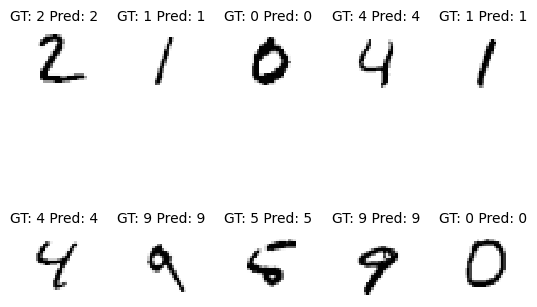

In [ ]:
model_name = 'Training_epoch_100.pth'
model.load_state_dict(torch.load(model_name, map_location=lambda storage, loc: storage))
count=1
model.eval()
for a in range (10):
    imarray = test_img[a].reshape(1,1,28,28)
    data = torch.from_numpy(imarray).float().cuda()
    output = model(data)
    _, predicted = torch.max(output.data, 1) # this line should be written by students
    plt.subplot(2,5,count)
    plt.subplots_adjust(hspace=0.2, wspace = 0.6)
    count += 1
    plt.axis('off')
    plt.title('GT: ' + str(test_label[a]) + ' Pred: ' + str(predicted.item()), fontsize=10)
    plt.imshow(imarray[0,0,:,:], cmap='Greys', interpolation='None')

**Task 4.** Change the learning rate and retrain the model again, plot the new training loss and original training loss in one figure and explain your discovery.